In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import statsmodels.api as sm

In [3]:
elearn = pd.read_excel('./dataset/ELearn_2020.xlsx', sheet_name='Elearning_Prepost')

In [4]:
elearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289057 entries, 0 to 289056
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   BULAN          289057 non-null  int64 
 1   USERNAME       289057 non-null  object
 2   CFU/FU         288919 non-null  object
 3   DIVISI         288918 non-null  object
 4   NAME           289054 non-null  object
 5   SURNAME        289057 non-null  object
 6   HCBP           288742 non-null  object
 7   COURSE         289057 non-null  object
 8   TGL PRE TEST   284910 non-null  object
 9   PRE TEST       284910 non-null  object
 10  TGL POST TEST  289057 non-null  object
 11  POST TEST      289057 non-null  object
 12  STATUS         289057 non-null  object
 13  JOB FAMILY     108029 non-null  object
dtypes: int64(1), object(13)
memory usage: 30.9+ MB


In [5]:
elearn.drop(elearn[elearn['STATUS'] == 'BELUM AKSES'].index, inplace = True)

In [6]:
elearn['POST TEST'] = pd.to_numeric(elearn['POST TEST'])
elearn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277221 entries, 1 to 289056
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BULAN          277221 non-null  int64  
 1   USERNAME       277221 non-null  object 
 2   CFU/FU         277098 non-null  object 
 3   DIVISI         277092 non-null  object 
 4   NAME           277218 non-null  object 
 5   SURNAME        277221 non-null  object 
 6   HCBP           276923 non-null  object 
 7   COURSE         277221 non-null  object 
 8   TGL PRE TEST   273074 non-null  object 
 9   PRE TEST       273074 non-null  object 
 10  TGL POST TEST  277221 non-null  object 
 11  POST TEST      277221 non-null  float64
 12  STATUS         277221 non-null  object 
 13  JOB FAMILY     102224 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 31.7+ MB


Kita ingin menganalisis E-Learning Wawasan Kebangsaan

In [7]:
#filter data wawasan kebangsaan
d_elearn = elearn[['COURSE', 'CFU/FU', 'DIVISI', 'NAME', 'POST TEST', 'STATUS']]
d_elearn.set_index('COURSE', inplace=True)
wasbang = d_elearn.loc['Wawasan Kebangsaan']

In [8]:
print(wasbang)

                            CFU/FU   DIVISI                     NAME  \
COURSE                                                                 
Wawasan Kebangsaan    CFU CONSUMER  DIV-TR1             ZAINAL BAHRI   
Wawasan Kebangsaan    CFU CONSUMER  DIV-TR6               ABDUL MUIS   
Wawasan Kebangsaan         FU NITS  DIV-DSO            DEDI SULAEMAN   
Wawasan Kebangsaan    CFU CONSUMER  DIV-TR5            I MADE SUDANA   
Wawasan Kebangsaan    CFU CONSUMER  DIV-TR6                    HEFNI   
...                            ...      ...                      ...   
Wawasan Kebangsaan  CFU ENTERPRISE  JVC-CIP            Rian Rizkiana   
Wawasan Kebangsaan          FU HCM  JVC-YPT   MAULANA REZI RAMADHANA   
Wawasan Kebangsaan  CFU ENTERPRISE  JVC-PCM            Mohamad Iqbal   
Wawasan Kebangsaan  CFU ENTERPRISE  JVC-ADM   HENDY ADRIAN WICAKSONO   
Wawasan Kebangsaan               T        T  NGAKAN MADE BAYU ADITYA   

                    POST TEST       STATUS  
COURSE            

In [9]:
wasbang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25397 entries, Wawasan Kebangsaan to Wawasan Kebangsaan
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CFU/FU     25385 non-null  object 
 1   DIVISI     25386 non-null  object 
 2   NAME       25397 non-null  object 
 3   POST TEST  25397 non-null  float64
 4   STATUS     25397 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.2+ MB


Kita akan menentukan mean, median, modus, varians, standar deviasi, serta range dari Post Test Wawasan Kebangsaan

In [10]:
#mean
mean_wasbang = wasbang['POST TEST'].mean()
print('Mean = ', mean_wasbang)

#median
median_wasbang = wasbang['POST TEST'].median()
print('Median = ', median_wasbang)

#modus
modus_wasbang = wasbang['POST TEST'].mode()
print('Modus = ', modus_wasbang)

#varians dengan degree of freedom = 1
var_wasbang = np.var(wasbang['POST TEST'], ddof=1)
print('Variance = ', var_wasbang)

#standar deviasi dengan degree of freedom = 1
std_wasbang = np.std(wasbang['POST TEST'], ddof = 1)
print('Standar Deviasi = ', std_wasbang)

#range
range_wasbang = wasbang['POST TEST'].max() - wasbang['POST TEST'].min()
print('Range = ', range_wasbang)

Mean =  90.64909241248967
Median =  90.0
Modus =  0    95.0
dtype: float64
Variance =  79.6473740581263
Standar Deviasi =  8.924537750389446
Range =  100.0


Dapat dilihat dari hasil statistik tersebut, apabila e-learning Wawasan Kebangsaan memiliki nilai mean 90,64 dimana rata-rata tersebut merupakan nilai yang cukup tinggi.

Nilai median dari e-learning Wawasan Kebangsaan adalah 90 serta modusnya 95.

Dengan menggunakan degree of freedom 1, nilai variance Post Test Wawasan Kebangsaan adalah 79,64, menandakan variasi nilai dari post test Wawasan Kebangsaan cukup besar. Sedangkan deviasinya adalah 8,92.

Range Wawasan Kebangsaan adalah 100. dimana berarti masih ada peserta yang mendapatkan nilai 0 dan ada juga peserta yang mendapat nilai 100.

Sekarang kita akan mencoba melihat distribusi dari data Post Test Wawasan Kebangsaan

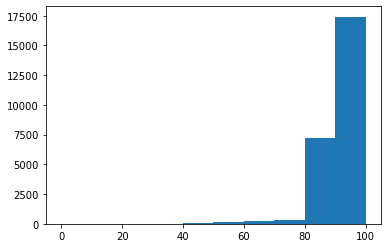

[Text(0, 0.5, 'Frekuensi'), Text(0.5, 0, 'Nilai Post Test')]

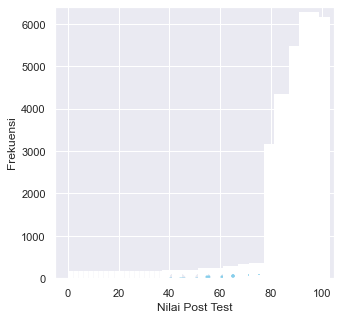

In [12]:
from matplotlib import pyplot
pyplot.hist(wasbang['POST TEST'])
pyplot.show()

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

data_plot = sns.distplot (wasbang['POST TEST'],
                         kde = False,
                         color = 'skyblue',
                         hist_kws = {"linewidth": 15, 'alpha': 1})
data_plot.set(xlabel = 'Nilai Post Test', ylabel = 'Frekuensi')

JIka kita melihat distribution plot dari data Post Test Wawasan Kebangsaan, visualisasi distribustion plot data tersebut menyerupai binomial distribution.

Selanjutnya kita akan mencoba membuat model probabilitas seseorang akan mengakses kembali e-learning Wawasan Kebangsaan setelah meangaksesnya.

Digunakan binomial distribution untuk membuat random variable.

[Text(0, 0.5, 'Frekuensi'), Text(0.5, 0, 'Binomial Distribution')]

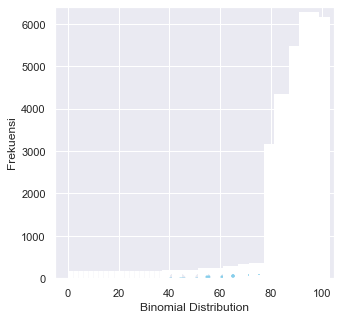

In [13]:
from scipy.stats import binom
binom_retest = binom.rvs (n=25397, p=0.5, size=10000)

dist_plot = sns.distplot (wasbang['POST TEST'],
                         kde = False,
                         color = 'skyblue',
                         hist_kws = {"linewidth": 15, 'alpha':1})
dist_plot.set(xlabel = 'Binomial Distribution', ylabel = 'Frekuensi')

Sekarang, kita akan menghitung nilai Confidence Interval dari data Post Test Wawasan Kebangsaan

In [14]:
n = wasbang['POST TEST'].count()
z = 1.96

SE = std_wasbang / np.sqrt(n)
lcb = mean_wasbang - z* SE #lower
ucb = mean_wasbang + z* SE #Upper
print ('Lower Limit of Post Test : ', lcb)
print ('Upper Limit of Post Test : ', ucb)

Lower Limit of Post Test :  90.53933077112629
Upper Limit of Post Test :  90.75885405385304


Dari hasil tersebut maka CI ada diantara 90,53 dan 90,75

Selanjutnya kita ingin menguji hypothesis apabila ada perbedaan mean antara CFU dengan FU. Kita akan ambil perwakilan FU yaitu FU HCM, dan perwakilan CFU yaitu CFU Consumer.

Mean1 = Mean Post Test CFU Consumer

Mean2 = Mean Post Test FU HCM

H0 : Mean 1 == Mean 2

H1 : Mean 1 =/= Mean 2

In [15]:
wasbang.set_index('CFU/FU', inplace=True)
hypo_wasbang1 = wasbang.loc['CFU CONSUMER']
hypo_wasbang2 = wasbang.loc['FU HCM']
hypo_wasbang1.info()
hypo_wasbang2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8435 entries, CFU CONSUMER to CFU CONSUMER
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DIVISI     8435 non-null   object 
 1   NAME       8435 non-null   object 
 2   POST TEST  8435 non-null   float64
 3   STATUS     8435 non-null   object 
dtypes: float64(1), object(3)
memory usage: 329.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3071 entries, FU HCM to FU HCM
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DIVISI     3071 non-null   object 
 1   NAME       3071 non-null   object 
 2   POST TEST  3071 non-null   float64
 3   STATUS     3071 non-null   object 
dtypes: float64(1), object(3)
memory usage: 120.0+ KB


In [16]:
n_cons = 8435
mean_cons = hypo_wasbang1['POST TEST'].mean()
std_cons = np.std(hypo_wasbang1['POST TEST'], ddof = 1)
print('CFU Consumer: ', n_cons, mean_cons, std_cons)

n_hcm = 3071
mean_hcm = hypo_wasbang2['POST TEST'].mean()
std_hcm = np.std(hypo_wasbang2['POST TEST'], ddof = 1)
print('FU HCM: ', n_hcm, mean_hcm, std_hcm)

CFU Consumer:  8435 90.55957320687611 10.011309791670012
FU HCM:  3071 90.99153370237707 8.05226777040732


In [17]:
sm.stats.ztest(hypo_wasbang1['POST TEST'].dropna(),
hypo_wasbang2['POST TEST'].dropna(), alternative = 'two-sided')

(-2.1511102217799953, 0.03146750089222486)

Dari hasil tersebut maka kita dapat mereject H0, sehingga memang ada perbedaan dari mean FU HCM dibandingkan dengan mean CFU Consumer